# Ilots EthnoBotaniques - Ilots de Chaleur Urbains

Analyses des données récoltées a fort de l'île Sainte-Hélène été 2023.

Sensor Elitech RC-5 identified by serial numbers (SN)

- SNxxx51 on brick wall of the fort
- SNxxx78 on the part covered by *Parthenocissus quinquefolia*

In [1]:
import requests
import pandas as pd
from geopy.geocoders import Nominatim
import seaborn as sns
import plotly.express as px


In [2]:
geolocator = Nominatim(user_agent="hien_foo")
montreal = geolocator.geocode("Montreal, Quebec, Canada")
lat = montreal.latitude
lon = montreal.longitude

print(f"{lat}, {lon}")

45.5031824, -73.5698065


In [3]:
# https://www.thepythoncode.com/article/interactive-weather-plot-with-matplotlib-and-requests

# Get the temperatures of a given location
#
response = requests.get(f'https://api.open-meteo.com/v1/forecast?latitude={lat}&longitude={lon}&hourly=temperature_2m')
response = requests.get(f"https://archive-api.open-meteo.com/v1/era5?latitude={lat}&longitude={lon}&start_date=2023-06-29&end_date=2023-07-10&hourly=temperature_2m")
temperatures = response.json().get('hourly')['temperature_2m']
datetimes = response.json().get('hourly')['time']
df_meteo_mtl = pd.DataFrame({'Dates': datetimes, 'Temperatures': temperatures})
df_meteo_mtl

,Dates,Temperatures
0,2023-06-29T00:00,20.1
1,2023-06-29T01:00,19.7
2,2023-06-29T02:00,19.3
3,2023-06-29T03:00,19.0
4,2023-06-29T04:00,18.8
...,...,...
283,2023-07-10T19:00,NaN
284,2023-07-10T20:00,NaN
285,2023-07-10T21:00,NaN
286,2023-07-10T22:00,NaN


<Axes: xlabel='Dates'>

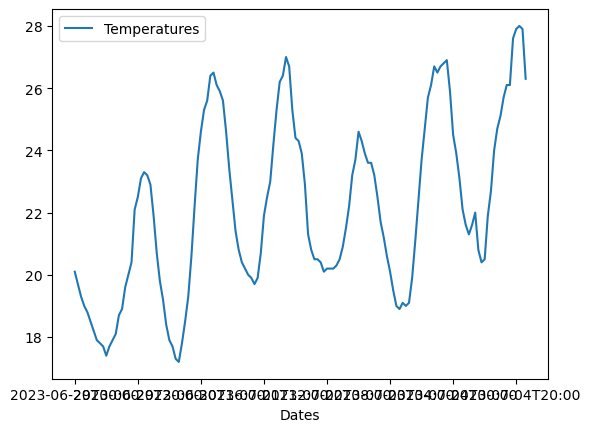

In [4]:
df_meteo_mtl.plot(x='Dates', y='Temperatures')

In [5]:
df78 = pd.read_excel('data/EFE231100378_0000001.xlsx', skiprows=28, usecols=[1, 2])
df78.columns = ['Dates', 'Sensor_78']
df78.head()

,Dates,Sensor_78
0,2023-06-28 14:46:48,22.3
1,2023-06-28 15:01:48,21.9
2,2023-06-28 15:16:48,21.3
3,2023-06-28 15:31:48,21.3
4,2023-06-28 15:46:48,20.9


In [6]:
df51 = pd.read_excel('data/EFE231100351_0000001.xlsx', skiprows=28, usecols=[1, 2])
df51.columns = ['Dates', 'Sensor_51']
df51.head()

,Dates,Sensor_51
0,2023-06-28 14:46:48,21.9
1,2023-06-28 15:01:48,22.6
2,2023-06-28 15:16:48,22.4
3,2023-06-28 15:31:48,22.2
4,2023-06-28 15:46:48,21.8


In [7]:
df513 = pd.read_excel('data/EFE231100351_0000003.xlsx', skiprows=28, usecols=[1, 2])
df513.columns = ['Dates', 'Sensor_513']
df513.head()

,Dates,Sensor_513
0,2023-06-28 14:46:48,21.9
1,2023-06-28 15:01:48,22.6
2,2023-06-28 15:16:48,22.4
3,2023-06-28 15:31:48,22.2
4,2023-06-28 15:46:48,21.8


In [8]:
df51_check = pd.merge(df51, df513, on='Dates')
df51_check

,Dates,Sensor_51,Sensor_513
0,2023-06-28 14:46:48,21.9,21.9
1,2023-06-28 15:01:48,22.6,22.6
2,2023-06-28 15:16:48,22.4,22.4
3,2023-06-28 15:31:48,22.2,22.2
4,2023-06-28 15:46:48,21.8,21.8
...,...,...,...
648,2023-07-05 08:46:48,25.4,25.4
649,2023-07-05 09:01:48,26.0,26.0
650,2023-07-05 09:16:48,26.7,26.7
651,2023-07-05 09:31:48,27.2,27.2


<Axes: xlabel='Dates'>

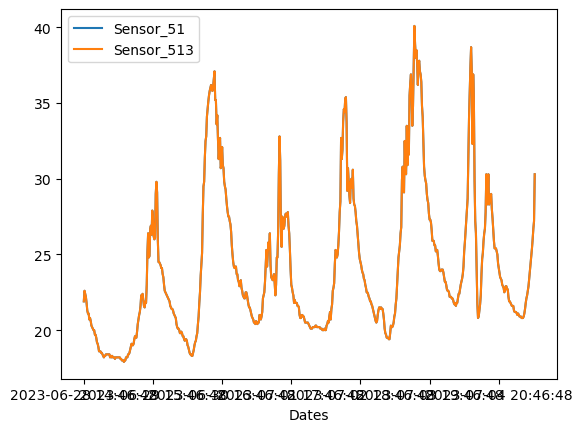

In [9]:
df51_check.plot(x="Dates", y=['Sensor_51', 'Sensor_513'])

There's no difference between the two files generated by sensor 51 so we use df51.

In [10]:
df = pd.merge(df51, df78, on='Dates')
df.describe()

,Sensor_51,Sensor_78
count,653.000000,653.000000
mean,24.133538,23.251302
std,4.861590,3.830358
min,17.900000,18.000000
25%,20.700000,20.600000
50%,22.500000,22.100000
75%,26.500000,25.600000
max,40.100000,38.800000


<Axes: xlabel='Dates'>

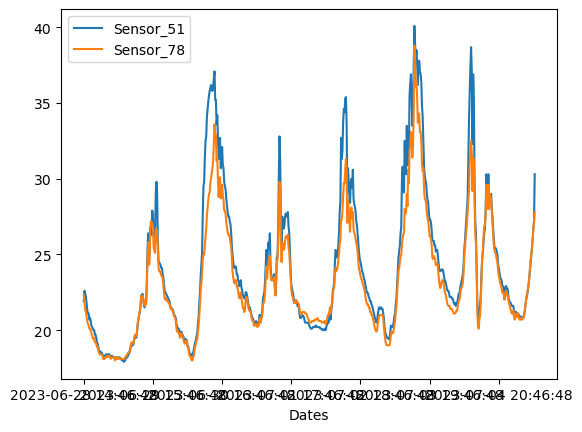

In [11]:
df.plot(x='Dates', y=['Sensor_51', 'Sensor_78'])

In [16]:
fig = px.line(df, x="Dates", y=df.columns,
              title='Temperatures on the wall of the fort')
fig.write_image('temperatures_by_sensors.png')
fig.show()

In [13]:
df1 = pd.concat([df, df_meteo_mtl])
df1

,Dates,Sensor_51,Sensor_78,Temperatures
0,2023-06-28 14:46:48,21.9,22.3,NaN
1,2023-06-28 15:01:48,22.6,21.9,NaN
2,2023-06-28 15:16:48,22.4,21.3,NaN
3,2023-06-28 15:31:48,22.2,21.3,NaN
4,2023-06-28 15:46:48,21.8,20.9,NaN
...,...,...,...,...
283,2023-07-10T19:00,NaN,NaN,NaN
284,2023-07-10T20:00,NaN,NaN,NaN
285,2023-07-10T21:00,NaN,NaN,NaN
286,2023-07-10T22:00,NaN,NaN,NaN


In [15]:
fig1 = px.line(df1, x="Dates", y=df1.columns,
              title='Temperatures on the wall of the fort')
fig1.show()